# CareerVillage.org 

references - https://towardsdatascience.com/learning-to-rank-with-python-scikit-learn-327a5cfd81f

In [1]:
# import statements for all of the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Data exploration

As per out solution we will need 3 csv files from the dataset which gives the information about the professionals, details of the questions asked and details of the asnwers given to those questions.

In [2]:
# Loading professional data and printing a few lines 
df_professionals = pd.read_csv('dataset/professionals.csv')
df_professionals.head()

,professionals_id,professionals_location,professionals_industry,professionals_headline,professionals_date_joined
0,9ced4ce7519049c0944147afb75a8ce3,NaN,NaN,NaN,2011-10-05 20:35:19 UTC+0000
1,f718dcf6d2ec4cb0a52a9db59d7f9e67,NaN,NaN,NaN,2011-10-05 20:49:21 UTC+0000
2,0c673e046d824ec0ad0ebe012a0673e4,"New York, New York",NaN,NaN,2011-10-18 17:31:26 UTC+0000
3,977428d851b24183b223be0eb8619a8c,"Boston, Massachusetts",NaN,NaN,2011-11-09 20:39:29 UTC+0000
4,e2d57e5041a44f489288397c9904c2b2,NaN,NaN,NaN,2011-12-10 22:14:44 UTC+0000


In [4]:
df_professionals['professionals_industry'].fillna('not available', inplace=True)

In [5]:
# Loading questions data and printing a few lines 
df_questions = pd.read_csv('dataset/questions.csv')
df_questions.head()

,questions_id,questions_author_id,questions_date_added,questions_title,questions_body
0,332a511f1569444485cf7a7a556a5e54,8f6f374ffd834d258ab69d376dd998f5,2016-04-26 11:14:26 UTC+0000,Teacher career question,What is a maths teacher? what is a ma...
1,eb80205482e4424cad8f16bc25aa2d9c,acccbda28edd4362ab03fb8b6fd2d67b,2016-05-20 16:48:25 UTC+0000,I want to become an army officer. What can I d...,I am Priyanka from Bangalore . Now am in 10th ...
2,4ec31632938a40b98909416bdd0decff,f2c179a563024ccc927399ce529094b5,2017-02-08 19:13:38 UTC+0000,Will going abroad for your first job increase ...,I'm planning on going abroad for my first job....
3,2f6a9a99d9b24e5baa50d40d0ba50a75,2c30ffba444e40eabb4583b55233a5a4,2017-09-01 14:05:32 UTC+0000,To become a specialist in business management...,i hear business management is a hard way to ge...
4,5af8880460c141dbb02971a1a8369529,aa9eb1a2ab184ebbb00dc01ab663428a,2017-09-01 02:36:54 UTC+0000,Are there any scholarships out there for stude...,I'm trying to find scholarships for first year...


In [6]:
# Loading answers data and printing a few lines 
df_answers = pd.read_csv('dataset/answers.csv')
df_answers.head()

,answers_id,answers_author_id,answers_question_id,answers_date_added,answers_body
0,4e5f01128cae4f6d8fd697cec5dca60c,36ff3b3666df400f956f8335cf53e09e,332a511f1569444485cf7a7a556a5e54,2016-04-29 19:40:14 UTC+0000,<p>Hi!</p>\n<p>You are asking a very interesti...
1,ada720538c014e9b8a6dceed09385ee3,2aa47af241bf42a4b874c453f0381bd4,eb80205482e4424cad8f16bc25aa2d9c,2018-05-01 14:19:08 UTC+0000,<p>Hi. I joined the Army after I attended coll...
2,eaa66ef919bc408ab5296237440e323f,cbd8f30613a849bf918aed5c010340be,eb80205482e4424cad8f16bc25aa2d9c,2018-05-02 02:41:02 UTC+0000,"<p>Dear Priyanka,</p><p>Greetings! I have answ..."
3,1a6b3749d391486c9e371fbd1e605014,7e72a630c303442ba92ff00e8ea451df,4ec31632938a40b98909416bdd0decff,2017-05-10 19:00:47 UTC+0000,<p>I work for a global company who values high...
4,5229c514000446d582050f89ebd4e184,17802d94699140b0a0d2995f30c034c6,2f6a9a99d9b24e5baa50d40d0ba50a75,2017-10-13 22:07:33 UTC+0000,I agree with Denise. Every single job I've had...


## Processing the industry column of the professional data 

In [7]:
# convert all the values in the industry columns to lower case
df_professionals['professionals_industry'] = df_professionals['professionals_industry'].str.lower()

In [8]:
# get the unique industries 
unique_industries = pd.Series(df_professionals['professionals_industry'].unique().astype(str))
unique_industries

0                                           not available
1                                          special events
2                                  education, tech, media
3                                        renewable energy
4                                hospitality & consulting
5                                             engineering
6                                                software
7                                                  mobile
8               healthcare, pharmaceuticals, life science
9                                                      ip
10           business development, electrical engineering
11                               environmental consulting
12                                           software/web
13                         biotechnology / pharmaceutical
14                                           tech / legal
15                                                finance
16                                                tech pr
17            

In [9]:
# there is still redundancy in the column values such as these
unique_industries[unique_industries.str.contains('computer')==True]

24                                      computer software
67                                         computer games
103                    computer science, machine learning
114                                     computer hardware
120                           computer & network security
143                                   computer networking
213                  computer software (formerly biology)
226                                      computer science
285                                     computer_software
330                computer software/media/communications
373                         video games/computer software
430                                 computer : all fields
435     video games, architectural visualization, comp...
472                      computer networking/ video games
499                                  computer engineering
501                     computer networking, broadcasting
514                         computer software and systems
515           

all these 74 entries correspond to a single field of computers.

In [10]:
# merge such entries to form a single common industry

industries = unique_industries.copy()

''' Function to merge the redundant industries '''
def merge_duplicates(industry):
    count = 0
    for i in industries:
        if industry in i:
            count = count + 1
        if count == 2:
            industries.drop(industries[industries == i].index, inplace=True)
            count = 1

In [11]:
# call merge duplicate function on the full column of industry
unique_industries.apply(merge_duplicates)
industries

0                                           not available
1                                          special events
2                                  education, tech, media
3                                        renewable energy
4                                hospitality & consulting
5                                             engineering
6                                                software
7                                                  mobile
8               healthcare, pharmaceuticals, life science
9                                                      ip
15                                                finance
18                                                nursing
19                                               internet
20                                                 design
22                       professional training & coaching
23                              marketing and advertising
27                                     financial services
30            

In [12]:
# create a temporary copy of industry column
temp_prof_industry = df_professionals['professionals_industry'].astype(str).copy()

In [13]:
''' Function to update the industries according to the new unique industries found '''
def update_industries(industry):
    global temp_prof_industry
    def check_industry(i):
        if industry in i:
            return industry
        else:
            return i
    temp_prof_industry = temp_prof_industry.apply(check_industry)

In [14]:
# update the industries for all records
for industry in temp_prof_industry:
    update_industries(industry)

In [15]:
industry_prof = list()

''' Function to group professionals according to their industries '''
def industry_prof_map(industry):
    global industry_prof
    industry_prof.append(list(df_professionals[df_professionals['professionals_industry'].str.contains(industry)==True]['professionals_id']))    

In [16]:
# group professionals according to their industries
industries.apply(industry_prof_map)

0       None
1       None
2       None
3       None
4       None
5       None
6       None
7       None
8       None
9       None
15      None
18      None
19      None
20      None
22      None
23      None
27      None
30      None
32      None
33      None
37      None
40      None
42      None
46      None
48      None
51      None
52      None
54      None
56      None
64      None
        ... 
2162    None
2166    None
2167    None
2171    None
2173    None
2179    None
2199    None
2205    None
2214    None
2218    None
2223    None
2237    None
2241    None
2243    None
2248    None
2255    None
2265    None
2267    None
2272    None
2274    None
2280    None
2285    None
2291    None
2294    None
2303    None
2325    None
2326    None
2335    None
2342    None
2346    None
Length: 352, dtype: object

In [17]:
# temp = np.array(industry_prof)
# temp
# industry_prof[1]

In [18]:
# creating a table with industry and a list of professionals under that industry
df_industry_prof_map = pd.DataFrame(list(zip(industries, industry_prof)), columns=['industry', 'prof_ids'])
df_industry_prof_map

,industry,prof_ids
0,not available,"[9ced4ce7519049c0944147afb75a8ce3, f718dcf6d2e..."
1,special events,[68ecc66323b8418092fdd724aaf5be94]
2,"education, tech, media",[c79d4e4fd9af4ab7a7e6b6f433128476]
3,renewable energy,"[5e9ee8611ee34185a90e4c40f02567ff, 70d367f85f4..."
4,hospitality & consulting,[1e4cc96c24344c8b806c26c3e6746167]
5,engineering,"[7a834b10a8c4494c96ca3fce733c7185, bccd61129e1..."
6,software,"[1ec14aee9311480681dfa81b0f193de8, 49ae0135ce3..."
7,mobile,"[ccad7c94952a49b9ad0fb85b09d1398d, c3668d2d663..."
8,"healthcare, pharmaceuticals, life science",[44b2484ecd3642c6a47514f3876cf14a]
9,ip,"[36adb6e6f7934f3c82eac29a615d066f, 54712234948..."


In [19]:
df_industry_prof_map['prof_ids'].ravel()

array([list(['9ced4ce7519049c0944147afb75a8ce3', 'f718dcf6d2ec4cb0a52a9db59d7f9e67', '0c673e046d824ec0ad0ebe012a0673e4', '977428d851b24183b223be0eb8619a8c', 'e2d57e5041a44f489288397c9904c2b2', 'c9bfa93898594cbbace436deca644c64', 'ed85488fb5e941eaa97014137fcbf317', '102fb92c28034ad988b593d0111cb4bb', '5a4a16842ec64430ac3f916aacf35fe1', '81999d5ad93549dab55636a545e84f2a', '7d425e8d7cfb4fe7b0702fff4d6d84e7', '7daf1e6dfb3443b99b240890f0a4d69b', 'b7dc946585734ab8acfbeeeb0d76af20', '4863a65cd35b42a1bb89f3ecfc8fa2fe', 'd07bdc32226e4d2c826da05b39a0f8f7', '2b17cd431763494fa6096617645ba173', '4ca2656185ca4ed298111128d2e1679e', '971937860c164896a0771bf502bad482', '0c9a2748560541be9fe2df0d7be88282', 'b6af2f682f0e4bf2af7783c1980820e6', '752fe9d006c246a285787563ddb69bf8', '0891498de2ed423f85ec713e00b53561', '8074bb4fb8894ab99c2716ea6ef91ff9', '5f77e0a2c3a144dda336df2294a64530', '8ff80b2548fa4e68892da71d1e320289', '20c67345727444678b7e91267f1c1d4b', '2a8328f6ceb548699a64293f986f3d19', '8e75aca48b434c

In [20]:
# splitting questions data
df_questions_test = df_questions.tail(100)
df_questions = df_questions.head(len(df_questions)-100)
df_questions_test

,questions_id,questions_author_id,questions_date_added,questions_title,questions_body
23831,c4cb60ad47d949729573c8f0ec853404,f5cad667c19549beb6d4411c5e4ba004,2017-09-01 04:55:04 UTC+0000,When should I begin to look for internships?,I plan on working in the fashion industry and ...
23832,3798eb1f0a7544319ba88162a996001c,6309ee956aa7400791d1224973b40fe9,2016-10-29 21:13:07 UTC+0000,For those interested in pursuing a career in e...,I have always been very interested in biology ...
23833,1f9a1837a82f4bdc878903792cfbd5c0,fbeebae527ac46d7ad0a2c2e5df564f0,2017-11-27 10:58:07 UTC+0000,Is it possible to branch off into speech and h...,"I am considering studying psychology, but is i..."
23834,44995e27fcf546da8eedf5fac6cf8f16,933f7648ddf9420485c43af8344a3d25,2018-01-26 18:27:55 UTC+0000,is it better to specialize your degree or rema...,"what are the advantages and disadvantages, not..."
23835,8c110a1e5da245698b46ccd160cfd645,e2e226cab7664b0a9956824d9e60e942,2017-09-01 12:45:43 UTC+0000,Which college is the best for computer science?,I just wanted to know which college is best fo...
23836,1f2982c98eab483a92cfca6b60d8ffcf,e04619bd74954afeb3e56e4458e79add,2016-05-23 00:08:24 UTC+0000,How Should I Prepare for an Internship Interview?,<p>I am applying to internships for this summe...
23837,471931296989495aad1a37304aa1c933,b31514bab60d4bab93555a89e1d957f7,2018-01-22 02:48:08 UTC+0000,Travel opportunities for historians,I will pursue a degree in history and would li...
23838,e83c3d20699b4b3eb38b6418e0eef76b,83f2f05cbbfe4b8c88b9758c15ab803a,2016-05-11 02:33:14 UTC+0000,Is there a significant difference between goin...,Hi! My name is Anina and I'm a high school sen...
23839,a829ca5dce994b66a450c77e1894ed5b,0fadf9f763774e478938d0c4d8600d7a,2016-05-13 02:42:55 UTC+0000,I am debating on whether to study teaching or ...,I am a senior in high school and I have always...
23840,04e65383a3254babb245af2cdeb8648c,0725a91589114229b5bb81aece6c52b3,2017-05-08 20:36:25 UTC+0000,How long do you need to go to collage for? Wha...,I love to code. #technology #tech #coding #code


In [21]:
# # splitting the answers data

df_temp = pd.merge(df_answers, df_questions, left_on='answers_question_id', right_on='questions_id', how='left')
df_temp['questions_id'].fillna('not available', inplace=True)
df_answers_test = df_temp.groupby('questions_id')[['answers_id', 'answers_author_id','answers_question_id','answers_date_added','answers_body']].get_group('not available')
l = list(df_answers_test['answers_id'])
df_answers = df_temp[~df_answers['answers_id'].isin(l)][['answers_id', 'answers_author_id','answers_question_id','answers_date_added','answers_body']]

In [22]:
df_answers.shape

(50845, 5)

In [23]:
df_answers_test.shape

(278, 5)

In [24]:
# df_industry_prof_map.loc[0]['prof_ids']

In [25]:
# industry_prof_ques = list()

# def industry_prof_ques_map(industry):
#     global df_industry_prof_map
#     global industry_prof_ques

#     item = df_industry_prof_map[df_industry_prof_map['industry']==industry]['prof_ids']
#     for i in item:
#         ques_list = list()
#         for prof_id in i:
#             ques_list.append(list(df_answers[df_answers['answers_author_id']==prof_id]['answers_question_id']))
# #         print(ques_list)
#         industry_prof_ques.append(list(zip(i, ques_list)))
    
# #     df_industry_prof_map[df_industry_prof_map['industry']==industry]['prof_ques'] = industry_prof_ques

In [26]:
# temp = df_industry_prof_map['industry'].apply(industry_prof_ques_map)
# # industry_prof_ques_map('special events')

In [27]:
# df_industry_prof_ques = pd.DataFrame(industry_prof_ques[0], columns=['prof_id', 'ques_id'])
# df_industry_prof_ques
# # industry_prof_ques[0]

In [28]:
# len(df_answers['answers_author_id'].unique())

In [29]:
# df_industry_prof_map['prof_ids']

based on the table created above now generate the tags for unique industries

In [30]:
# generating tags for industries

# industry_prof_ques = list()
# df_industry_prof_map['tags'] = pd.Series(np.zeros(700), dtype='object')
tags_series = list()

def industry_prof_ques_map(industry):
    global df_industry_prof_map
#     global industry_prof_ques

    item = df_industry_prof_map[df_industry_prof_map['industry']==industry]['prof_ids']
    tags_list = list()
    for i in item:
        ques_list = list()
        for prof_id in i:
            # list of questions answered by the prof_id
            questions = list(df_answers[df_answers['answers_author_id']==prof_id]['answers_question_id'])
            ques_list.append(questions)
            # print(ques_list)
            
            # get the keywords of those questions
            
            for ques in questions:
                ques_body = df_questions[df_questions['questions_id']==ques]['questions_body']

                if len(ques_body) != 0:
                    tags = ques_body.iloc[0].split('#')
                    for t in range(1, len(tags)):
                        tags[t] = tags[t].strip(' ')
                        temp_tag = tags[t].split(' ')
                        tags_list.append(temp_tag[0])

        tags_series.append(list(set(tags_list)))
#         print(tags_series)
#         industry_prof_ques.append(list(zip(i, ques_list)))
    
#     df_industry_prof_map[df_industry_prof_map['industry']==industry]['prof_ques'] = industry_prof_ques

In [31]:
df_industry_prof_map['industry'].apply(industry_prof_ques_map)

0      None
1      None
2      None
3      None
4      None
5      None
6      None
7      None
8      None
9      None
10     None
11     None
12     None
13     None
14     None
15     None
16     None
17     None
18     None
19     None
20     None
21     None
22     None
23     None
24     None
25     None
26     None
27     None
28     None
29     None
       ... 
322    None
323    None
324    None
325    None
326    None
327    None
328    None
329    None
330    None
331    None
332    None
333    None
334    None
335    None
336    None
337    None
338    None
339    None
340    None
341    None
342    None
343    None
344    None
345    None
346    None
347    None
348    None
349    None
350    None
351    None
Name: industry, Length: 352, dtype: object

In [32]:
# insert the tags in the original table
df_industry_prof_map['tags'] = tags_series

In [33]:
# display the contents of the table
pd.options.display.max_colwidth = 50
df_industry_prof_map.head()

,industry,prof_ids,tags
0,not available,"[9ced4ce7519049c0944147afb75a8ce3, f718dcf6d2e...","[, organization, international-experience, roo..."
1,special events,[68ecc66323b8418092fdd724aaf5be94],"[career-path, communication-skills, public-rel..."
2,"education, tech, media",[c79d4e4fd9af4ab7a7e6b6f433128476],"[education, skills, connections, graduate-scho..."
3,renewable energy,"[5e9ee8611ee34185a90e4c40f02567ff, 70d367f85f4...","[engineering, environmental-science, salesforc..."
4,hospitality & consulting,[1e4cc96c24344c8b806c26c3e6746167],"[cooking, cook, bakery, culinary, business-ide..."


In [34]:
# # get all the professionals answering frequencies
# prof_ids, counts = np.unique(df_answers['answers_author_id'], return_counts=True)
# frequencies = pd.DataFrame(list(zip(prof_ids, counts)), columns=['prof_ids', 'counts'])
# ax = frequencies.groupby('counts')['counts'].size().hist()
# ax.set_xlabel("count of answers")
# ax.set_ylabel("number of professionals")

we can observe that maximum number of professionals answer less number of questions. there are very few professionals who answer more number of questions. lets look closely to the 0-50 bin.

In [35]:
# ax = frequencies.groupby('counts')['counts'].size().hist(bins=[0, 10, 20, 30, 40, 50])
# ax.set_xlabel("count of answers")
# ax.set_ylabel("number of professionals")

so maximum professionals answer 1-10 number of questions. from this we can infer that when new questions come they should be directed to the professionals having a higher rate of answering and also as per majority the professionals who have recently joined i.e. new professionals who have not answered yet are most likely to answer a new question. so we will consider the ratio of number of questions answered and the number of months they are active. 

In [36]:
# prof_id_date = df_professionals[df_professionals['professionals_id'].isin(prof_ids)]['professionals_date_joined']
# prof_id_date = pd.to_datetime(prof_id_date)
# frequencies['profs_date'] = prof_id_date
# frequencies['profs_date'] = frequencies['profs_date'].fillna(pd.to_datetime(0))

In [37]:
# answerfreq = list()

# def get_answerfreq(count, date): 
# #     print(frequency)
#     answerfreq.append(count / ((pd.Timestamp.now()-date) // np.timedelta64(1, 'M')))
    
# frequencies.apply(lambda x: get_answerfreq(x.counts, x.profs_date), axis=1)

In [38]:
# frequencies['ans_freq'] = pd.Series(answerfreq)
# frequencies = frequencies.drop('profs_date', axis=1)
# frequencies.head()

In [39]:
# extract the tags
def extract_tags(question):
    ques_tags = list()
    ques_tags_list = question.split('#')
    for t in range(1, len(ques_tags_list)):
        ques_tags_list[t] = ques_tags_list[t].strip(' ')
        temp_tag = ques_tags_list[t].split(' ')
        ques_tags.append(temp_tag[0])
    return ques_tags

In [40]:
# predict the most likely professionals to answer the given question
def predict_professionals(ques_tags, by):
#     selected_industries = list()
    likely_professionals = list()

    matches = list()
    for i in range(0, len(df_industry_prof_map)):
        ind_matches = set(ques_tags).intersection(df_industry_prof_map.iloc[i][by])
        matches.append(len(ind_matches))
    
    max_element = max(matches)
    for i in range(0, len(matches)):
        if matches[i] == max_element:
            likely_professionals.append(df_industry_prof_map.iloc[i]['prof_ids'])
        
    print('Number of industries matched: {}'.format(len(likely_professionals)))
    
    # flatten the list
    likely_professionals = [item for sublist in likely_professionals for item in sublist]
    print('Number of professionals matched: {}'.format(len(likely_professionals)))
    
    df_likely_profs = pd.DataFrame(list(set(likely_professionals)), columns=['prof_ids'])
    
    return df_likely_profs

In [41]:
pd.options.display.max_colwidth = 50

In [42]:
# ''' Function to predict professionals '''
# def predict_professionals(question):
    
#     ques_tags = extract_tags(question['questions_body'])
#     # our prediction
#     likely_profs = rank_professionals(ques_tags, 'tags')
# #     print(max(likely_profs['ans_freq']))
# #     print(min(likely_profs['ans_freq']))
#     return likely_profs

In [45]:
count_found = 0
count_not_found = 0

likely_profs = []
# testing the method on 100 new questions 
for i in range(0, 100):
    print("Question {}".format(i))
    question = df_questions_test.iloc[i]
    question_id = question['questions_id']
    question_body = question['questions_body']
    
    ques_tags = extract_tags(question_body)
    # our prediction
    likely_profs = predict_professionals(ques_tags, 'tags')
    
    # actual output
    profs = df_answers_test[df_answers_test['answers_question_id']==question_id]
    profs_list = profs['answers_author_id']
    # checking the predicted list contains the professionals who did answer the question
    print(likely_profs[likely_profs['prof_ids'].isin(profs_list)])
    if len(likely_profs[likely_profs['prof_ids'].isin(profs_list)]) == 0:
        count_not_found += 1
    else:
        count_found += 1
    print()
    print()

Question 0
Number of industries matched: 3
Number of professionals matched: 4039
Empty DataFrame
Columns: [prof_ids]
Index: []


Question 1
Number of industries matched: 2
Number of professionals matched: 2996
Empty DataFrame
Columns: [prof_ids]
Index: []


Question 2
Number of industries matched: 2
Number of professionals matched: 2996
                              prof_ids
1862  a1006e6a58a0447592e2435caa230f78


Question 3
Number of industries matched: 4
Number of professionals matched: 3519
Empty DataFrame
Columns: [prof_ids]
Index: []


Question 4
Number of industries matched: 18
Number of professionals matched: 9315
                              prof_ids
1305  29b6c4b35d054100ba2bee5ace164bbb
4217  eafd892b820c4ba68d50d924940427db
6133  b25b37b931f84c588c38d7225ec31dd5
6916  eefd04d904cb4be7a441ec8bb2af84ba
7509  68399ff7b1e5455e976ee8593a9c63f5


Question 5
Number of industries matched: 352
Number of professionals matched: 12755
                               prof_ids
10359  05b

Empty DataFrame
Columns: [prof_ids]
Index: []


Question 54
Number of industries matched: 10
Number of professionals matched: 6846
Empty DataFrame
Columns: [prof_ids]
Index: []


Question 55
Number of industries matched: 352
Number of professionals matched: 12755
                               prof_ids
2516   14e1888a974b40c59d16ec4e217b9ae5
5958   0dab6d4432094a4096274fc4fd893f0e
10492  e95e6d0fabb1401c8f32a433cd29c369


Question 56
Number of industries matched: 15
Number of professionals matched: 8207
Empty DataFrame
Columns: [prof_ids]
Index: []


Question 57
Number of industries matched: 20
Number of professionals matched: 6816
                              prof_ids
2959  44c98def686845f29460c9fffdd62cdc
2974  cafb6a1bb68a40d896bf5325b29650b4


Question 58
Number of industries matched: 352
Number of professionals matched: 12755
                              prof_ids
407   4e0bccffa8b84ab4917c899d06a3c976
4268  327e3aeb0e174b8bb49ab6bc75ca3f89


Question 59
Number of industries matc

so our computed list of professionals does include the professionals who have answered the questions. 
but the prediction we made earlier that the professionals answering the most would be the most active ones and would answer the new questions is partly wrong as there are many questions which have been answered by professionals who have answered very less questions earlier.

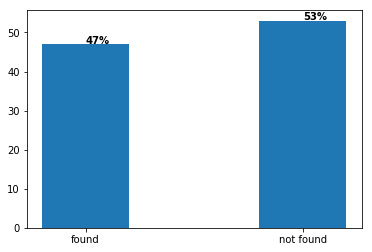

In [46]:
counts = [count_found, count_not_found]
def plot_bar(counts):
    fig, ax = plt.subplots() 
    for a,b in zip(['found', 'not found'], counts):
        plt.text(a, b+1, str(b)+"%", color='black', va='center', fontweight='bold')
    plt.bar(['found', 'not found'], counts, 0.4)
plot_bar(counts)

# Exp 2

creating keywords based on question tags+title+body and comparing against the combinations of question tags, title and body 

In [47]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import stop_words
import re

keywords_series = list()

def industry_prof_queskeywords_map(industry):
    global df_industry_prof_map
    global keywords_series
    
    item = df_industry_prof_map[df_industry_prof_map['industry']==industry]['prof_ids']
    text_list = list()
    for i in item:
        ques_list = list()
        for prof_id in i:
            # list of questions answered by the prof_id
            questions = list(df_answers[df_answers['answers_author_id']==prof_id]['answers_question_id'])
            ques_list.append(questions)
            # print(ques_list)
            
            # get the keywords of those questions
            
            for ques in questions:
                ques_title = df_questions[df_questions['questions_id']==ques]['questions_title'] 
                ques_body = df_questions[df_questions['questions_id']==ques]['questions_body']

                if len(ques_title) != 0:
                    title = ques_title.iloc[0].lower()
                    # remove special characters and digits
                    title = re.sub("(\\d|\\W_)+", " ", title)
                if len(ques_body) != 0:
                    body = ques_body.iloc[0]
                    body = body.strip(' ')
                    body = re.sub("(\\d|\\W_)+", " ", body)
                text = title + body
                text_list.append(text)
                    
        # creating vocabulary of words 
        # eliminating stop words
        keywords = list()
        if len(text_list) != 0:
            cv = CountVectorizer(stop_words=stop_words.ENGLISH_STOP_WORDS)
            cv.fit(text_list)
            keywords = cv.get_feature_names()
         
        keywords_series.append(keywords)

In [48]:
df_industry_prof_map['industry'].apply(industry_prof_queskeywords_map)

0      None
1      None
2      None
3      None
4      None
5      None
6      None
7      None
8      None
9      None
10     None
11     None
12     None
13     None
14     None
15     None
16     None
17     None
18     None
19     None
20     None
21     None
22     None
23     None
24     None
25     None
26     None
27     None
28     None
29     None
       ... 
322    None
323    None
324    None
325    None
326    None
327    None
328    None
329    None
330    None
331    None
332    None
333    None
334    None
335    None
336    None
337    None
338    None
339    None
340    None
341    None
342    None
343    None
344    None
345    None
346    None
347    None
348    None
349    None
350    None
351    None
Name: industry, Length: 352, dtype: object

In [49]:
# insert the tags in the original table
df_industry_prof_map['keywords'] = keywords_series

In [50]:
df_industry_prof_map.head()

,industry,prof_ids,tags,keywords
0,not available,"[9ced4ce7519049c0944147afb75a8ce3, f718dcf6d2e...","[, organization, international-experience, roo...","[___, _this, aa, aau, abc, abigail, abilities,..."
1,special events,[68ecc66323b8418092fdd724aaf5be94],"[career-path, communication-skills, public-rel...","[asking, attending, best, business, care, care..."
2,"education, tech, media",[c79d4e4fd9af4ab7a7e6b6f433128476],"[education, skills, connections, graduate-scho...","[actual, administration, administrator, advice..."
3,renewable energy,"[5e9ee8611ee34185a90e4c40f02567ff, 70d367f85f4...","[engineering, environmental-science, salesforc...","[aeronautic, aeronautics, aerospace, associate..."
4,hospitality & consulting,[1e4cc96c24344c8b806c26c3e6746167],"[cooking, cook, bakery, culinary, business-ide...","[adopt, advice, angry, appreciated, arts, aver..."


In [51]:
def extract_keywords(question, by):
    
    title = question['questions_title'].lower()
    title = re.sub("(\\d|\\W_)+", " ", title)
    body = question['questions_body'].lower()
    body = re.sub("(\\d|\\W_)+", " ", body)
        
    if by == 'title' or by == 'title+tags':
        text = [title]
    elif by == 'body+tags':
        text = [body]
    elif by == 'title+body+tags':
        text = [title + body]
        
    cv = CountVectorizer(stop_words=stop_words.ENGLISH_STOP_WORDS)
    cv.fit(text)
    keywords = cv.get_feature_names()
    
    if by == 'title+tags':
        tags = extract_tags(body)
        keywords += tags
    
    return keywords

In [55]:
def predict_by_keywords(by):
    
    count_found = 0
    count_not_found = 0
    likely_profs = []
    # testing the method on 100 new questions 
    for i in range(0, 100):
        print("Question {}".format(i))
        question = df_questions_test.iloc[i]
        question_id = df_questions_test.iloc[i]['questions_id']

        keywords = extract_keywords(question, by)
        likely_profs = predict_professionals(keywords, 'keywords')

        # actual output
        profs = df_answers_test[df_answers_test['answers_question_id']==question_id]
        profs_list = profs['answers_author_id']
        # checking the predicted list contains the professionals who did answer the question
        print(likely_profs[likely_profs['prof_ids'].isin(profs_list)])
        if len(likely_profs[likely_profs['prof_ids'].isin(profs_list)]) == 0:
            count_not_found += 1
        else:
            count_found += 1
        print()
        print()
        
    return [count_found, count_not_found]

In [56]:
counts = predict_by_keywords('title')

Question 0
Number of industries matched: 34
Number of professionals matched: 10699
                              prof_ids
6373  ef3371ee80904230a7111c6200ef6b46


Question 1
Number of industries matched: 1
Number of professionals matched: 420
Empty DataFrame
Columns: [prof_ids]
Index: []


Question 2
Number of industries matched: 11
Number of professionals matched: 7390
                              prof_ids
3010  a1006e6a58a0447592e2435caa230f78


Question 3
Number of industries matched: 11
Number of professionals matched: 8049
Empty DataFrame
Columns: [prof_ids]
Index: []


Question 4
Number of industries matched: 57
Number of professionals matched: 11474
                              prof_ids
1582  29b6c4b35d054100ba2bee5ace164bbb
5166  eafd892b820c4ba68d50d924940427db
7504  b25b37b931f84c588c38d7225ec31dd5
8457  eefd04d904cb4be7a441ec8bb2af84ba
9185  68399ff7b1e5455e976ee8593a9c63f5


Question 5
Number of industries matched: 34
Number of professionals matched: 9898
                

Number of industries matched: 26
Number of professionals matched: 9486
Empty DataFrame
Columns: [prof_ids]
Index: []


Question 53
Number of industries matched: 18
Number of professionals matched: 9003
Empty DataFrame
Columns: [prof_ids]
Index: []


Question 54
Number of industries matched: 2
Number of professionals matched: 1091
Empty DataFrame
Columns: [prof_ids]
Index: []


Question 55
Number of industries matched: 2
Number of professionals matched: 1076
Empty DataFrame
Columns: [prof_ids]
Index: []


Question 56
Number of industries matched: 20
Number of professionals matched: 9643
Empty DataFrame
Columns: [prof_ids]
Index: []


Question 57
Number of industries matched: 2
Number of professionals matched: 2670
                              prof_ids
1976  44c98def686845f29460c9fffdd62cdc
2008  cafb6a1bb68a40d896bf5325b29650b4


Question 58
Number of industries matched: 1
Number of professionals matched: 2576
                             prof_ids
924  327e3aeb0e174b8bb49ab6bc75ca3f89


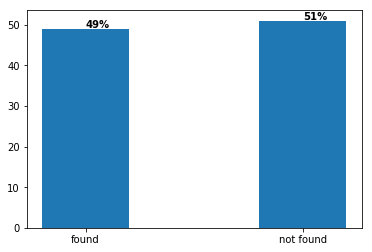

In [57]:
plot_bar(counts)

In [58]:
counts = predict_by_keywords('body+tags')

Question 0
Number of industries matched: 4
Number of professionals matched: 3798
Empty DataFrame
Columns: [prof_ids]
Index: []


Question 1
Number of industries matched: 1
Number of professionals matched: 2576
Empty DataFrame
Columns: [prof_ids]
Index: []


Question 2
Number of industries matched: 5
Number of professionals matched: 3764
                              prof_ids
2329  a1006e6a58a0447592e2435caa230f78


Question 3
Number of industries matched: 3
Number of professionals matched: 4365
Empty DataFrame
Columns: [prof_ids]
Index: []


Question 4
Number of industries matched: 32
Number of professionals matched: 10329
                              prof_ids
1436  29b6c4b35d054100ba2bee5ace164bbb
4688  eafd892b820c4ba68d50d924940427db
6807  b25b37b931f84c588c38d7225ec31dd5
7661  eefd04d904cb4be7a441ec8bb2af84ba
8324  68399ff7b1e5455e976ee8593a9c63f5


Question 5
Number of industries matched: 17
Number of professionals matched: 8799
                              prof_ids
7233  05b927

                             prof_ids
924  327e3aeb0e174b8bb49ab6bc75ca3f89


Question 59
Number of industries matched: 1
Number of professionals matched: 2576
Empty DataFrame
Columns: [prof_ids]
Index: []


Question 60
Number of industries matched: 12
Number of professionals matched: 7619
                              prof_ids
2720  ff08a0e21fcb40a591a53cf73258051b


Question 61
Number of industries matched: 6
Number of professionals matched: 6235
                              prof_ids
1072  422412a0f6154a4ebf8f7dd026d66a5b


Question 62
Number of industries matched: 2
Number of professionals matched: 3393
                              prof_ids
2222  12e8dea2f3534f6dbc31701cf64f9a4f


Question 63
Number of industries matched: 4
Number of professionals matched: 4705
Empty DataFrame
Columns: [prof_ids]
Index: []


Question 64
Number of industries matched: 1
Number of professionals matched: 340
Empty DataFrame
Columns: [prof_ids]
Index: []


Question 65
Number of industries matched: 16
N

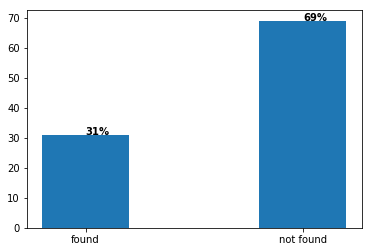

In [59]:
plot_bar(counts)

In [60]:
counts = predict_by_keywords('title+body+tags')

Question 0
Number of industries matched: 4
Number of professionals matched: 3798
Empty DataFrame
Columns: [prof_ids]
Index: []


Question 1
Number of industries matched: 1
Number of professionals matched: 2576
Empty DataFrame
Columns: [prof_ids]
Index: []


Question 2
Number of industries matched: 5
Number of professionals matched: 3764
                              prof_ids
2329  a1006e6a58a0447592e2435caa230f78


Question 3
Number of industries matched: 3
Number of professionals matched: 4365
Empty DataFrame
Columns: [prof_ids]
Index: []


Question 4
Number of industries matched: 32
Number of professionals matched: 10329
                              prof_ids
1436  29b6c4b35d054100ba2bee5ace164bbb
4688  eafd892b820c4ba68d50d924940427db
6807  b25b37b931f84c588c38d7225ec31dd5
7661  eefd04d904cb4be7a441ec8bb2af84ba
8324  68399ff7b1e5455e976ee8593a9c63f5


Question 5
Number of industries matched: 16
Number of professionals matched: 8146
                              prof_ids
6708  05b927

Number of industries matched: 1
Number of professionals matched: 2576
                             prof_ids
924  327e3aeb0e174b8bb49ab6bc75ca3f89


Question 59
Number of industries matched: 1
Number of professionals matched: 2576
Empty DataFrame
Columns: [prof_ids]
Index: []


Question 60
Number of industries matched: 12
Number of professionals matched: 7619
                              prof_ids
2720  ff08a0e21fcb40a591a53cf73258051b


Question 61
Number of industries matched: 5
Number of professionals matched: 5773
                             prof_ids
994  422412a0f6154a4ebf8f7dd026d66a5b


Question 62
Number of industries matched: 1
Number of professionals matched: 2576
                              prof_ids
1710  12e8dea2f3534f6dbc31701cf64f9a4f


Question 63
Number of industries matched: 3
Number of professionals matched: 4365
Empty DataFrame
Columns: [prof_ids]
Index: []


Question 64
Number of industries matched: 1
Number of professionals matched: 340
Empty DataFrame
Columns: [

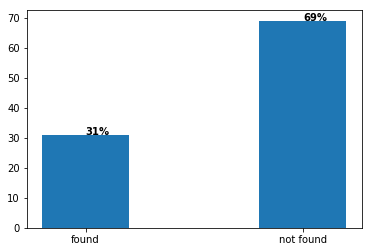

In [61]:
plot_bar(counts)

In [62]:
counts = predict_by_keywords('title+tags')

Question 0
Number of industries matched: 34
Number of professionals matched: 10699
                              prof_ids
6373  ef3371ee80904230a7111c6200ef6b46


Question 1
Number of industries matched: 2
Number of professionals matched: 2996
Empty DataFrame
Columns: [prof_ids]
Index: []


Question 2
Number of industries matched: 5
Number of professionals matched: 3764
                              prof_ids
2329  a1006e6a58a0447592e2435caa230f78


Question 3
Number of industries matched: 8
Number of professionals matched: 7144
Empty DataFrame
Columns: [prof_ids]
Index: []


Question 4
Number of industries matched: 57
Number of professionals matched: 11474
                              prof_ids
1582  29b6c4b35d054100ba2bee5ace164bbb
5166  eafd892b820c4ba68d50d924940427db
7504  b25b37b931f84c588c38d7225ec31dd5
8457  eefd04d904cb4be7a441ec8bb2af84ba
9185  68399ff7b1e5455e976ee8593a9c63f5


Question 5
Number of industries matched: 34
Number of professionals matched: 9898
                 

Empty DataFrame
Columns: [prof_ids]
Index: []


Question 55
Number of industries matched: 2
Number of professionals matched: 1076
Empty DataFrame
Columns: [prof_ids]
Index: []


Question 56
Number of industries matched: 20
Number of professionals matched: 9643
Empty DataFrame
Columns: [prof_ids]
Index: []


Question 57
Number of industries matched: 2
Number of professionals matched: 2670
                              prof_ids
1976  44c98def686845f29460c9fffdd62cdc
2008  cafb6a1bb68a40d896bf5325b29650b4


Question 58
Number of industries matched: 1
Number of professionals matched: 2576
                             prof_ids
924  327e3aeb0e174b8bb49ab6bc75ca3f89


Question 59
Number of industries matched: 2
Number of professionals matched: 3114
Empty DataFrame
Columns: [prof_ids]
Index: []


Question 60
Number of industries matched: 34
Number of professionals matched: 10074
                              prof_ids
3552  ff08a0e21fcb40a591a53cf73258051b


Question 61
Number of industries mat

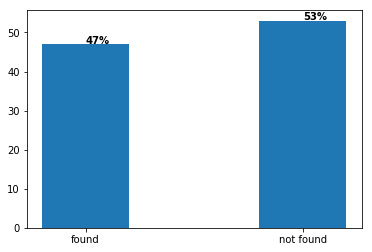

In [63]:
plot_bar(counts)

# Exp 3

using the above calculated frequencies to rank the professionals and get a smaller list of resulting professionals list. we'll use the combination of keywords and title as it is giving better accuracy compared to other configurations.

ranking based on answering frequency i.e. the ratio of the cnumber of questions answered to the number of months active of the professionals 

Text(0,0.5,'number of professionals')

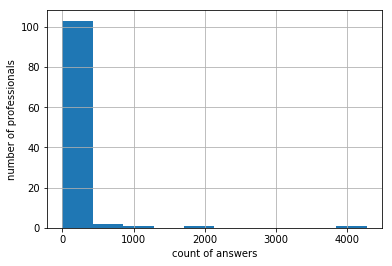

In [64]:
# get all the professionals answering frequencies
prof_ids, counts = np.unique(df_answers['answers_author_id'], return_counts=True)
frequencies = pd.DataFrame(list(zip(prof_ids, counts)), columns=['prof_ids', 'counts'])
ax = frequencies.groupby('counts')['counts'].size().hist()
ax.set_xlabel("count of answers")
ax.set_ylabel("number of professionals")

Text(0,0.5,'number of professionals')

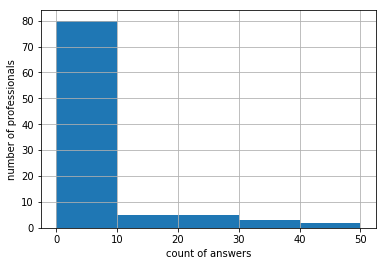

In [65]:
ax = frequencies.groupby('counts')['counts'].size().hist(bins=[0, 10, 20, 30, 40, 50])
ax.set_xlabel("count of answers")
ax.set_ylabel("number of professionals")

In [66]:
prof_id_date = df_professionals[df_professionals['professionals_id'].isin(prof_ids)]['professionals_date_joined']
prof_id_date = pd.to_datetime(prof_id_date)
frequencies['profs_date'] = prof_id_date
frequencies['profs_date'] = frequencies['profs_date'].fillna(pd.to_datetime(0))

In [67]:
answerfreq = list()

def get_answerfreq(count, date): 
#     print(frequency)
    answerfreq.append(count / ((pd.Timestamp.now()-date) // np.timedelta64(1, 'M')))
    
frequencies.apply(lambda x: get_answerfreq(x.counts, x.profs_date), axis=1)

0        None
1        None
2        None
3        None
4        None
5        None
6        None
7        None
8        None
9        None
10       None
11       None
12       None
13       None
14       None
15       None
16       None
17       None
18       None
19       None
20       None
21       None
22       None
23       None
24       None
25       None
26       None
27       None
28       None
29       None
         ... 
10121    None
10122    None
10123    None
10124    None
10125    None
10126    None
10127    None
10128    None
10129    None
10130    None
10131    None
10132    None
10133    None
10134    None
10135    None
10136    None
10137    None
10138    None
10139    None
10140    None
10141    None
10142    None
10143    None
10144    None
10145    None
10146    None
10147    None
10148    None
10149    None
10150    None
Length: 10151, dtype: object

In [68]:
frequencies['ans_freq'] = pd.Series(answerfreq)
frequencies = frequencies.drop('profs_date', axis=1)
frequencies.head()

,prof_ids,counts,ans_freq
0,00009a0f9bda43eba47104e9ac62aff5,3,0.032967
1,000d4635e5da41e3bfd83677ee11dda4,3,0.005068
2,00271cc10e0245fba4a35e76e669c281,24,0.266667
3,003cc21be89d4e42bc4424131a378e86,4,0.044444
4,0046ab8089c04b3a8df3f8c28621a818,5,0.008446


In [108]:
def rank_professionals(df_likely_profs, by):
    
    # for ranking the professionals first find out the number of questions they have answered before
    df_likely_profs_frequency = pd.merge(frequencies, df_likely_profs, on='prof_ids', how='inner')
    
    # return the list of likely professionals
    if by == 'ans_freq':
        return df_likely_profs_frequency.sort_values(by, ascending=False).head(400)
    else:
        return df_likely_profs_frequency.sort_values(by)[500:1300]

In [100]:
# 0-172, 1-not, 2-172, 3-not, 4-172, 5-172, 6-not, 7-780, 8-not, 9-780,1450, 10-not
count_found = 0
count_not_found = 0
likely_profs = []
# testing the method on 100 new questions 
for i in range(0, 100):
    print("Question {}".format(i))
    question = df_questions_test.iloc[i]
    question_id = df_questions_test.iloc[i]['questions_id']

    keywords = extract_keywords(question, 'title')
    likely_professionals = predict_professionals(keywords, 'keywords')
    likely_profs = rank_professionals(likely_professionals, 'ans_freq')

    # actual output
    profs = df_answers_test[df_answers_test['answers_question_id']==question_id]
    profs_list = profs['answers_author_id']
    # checking the predicted list contains the professionals who did answer the question
    print(likely_profs[likely_profs['prof_ids'].isin(profs_list)])
    if len(likely_profs[likely_profs['prof_ids'].isin(profs_list)]) == 0:
        count_not_found += 1
    else:
        count_found += 1
    print()
    print()

Question 0
Number of industries matched: 34
Number of professionals matched: 10699
                              prof_ids  counts  ans_freq  time_freq
3644  ef3371ee80904230a7111c6200ef6b46       4  0.153846     520.75


Question 1
Number of industries matched: 1
Number of professionals matched: 420
Empty DataFrame
Columns: [prof_ids, counts, ans_freq, time_freq]
Index: []


Question 2
Number of industries matched: 11
Number of professionals matched: 7390
                              prof_ids  counts  ans_freq   time_freq
1752  a1006e6a58a0447592e2435caa230f78     908  1.533784  1195.01652


Question 3
Number of industries matched: 11
Number of professionals matched: 8049
Empty DataFrame
Columns: [prof_ids, counts, ans_freq, time_freq]
Index: []


Question 4
Number of industries matched: 57
Number of professionals matched: 11474
Empty DataFrame
Columns: [prof_ids, counts, ans_freq, time_freq]
Index: []


Question 5
Number of industries matched: 34
Number of professionals matched: 9898

Number of industries matched: 17
Number of professionals matched: 8778
Empty DataFrame
Columns: [prof_ids, counts, ans_freq, time_freq]
Index: []


Question 47
Number of industries matched: 5
Number of professionals matched: 3919
Empty DataFrame
Columns: [prof_ids, counts, ans_freq, time_freq]
Index: []


Question 48
Number of industries matched: 32
Number of professionals matched: 10134
Empty DataFrame
Columns: [prof_ids, counts, ans_freq, time_freq]
Index: []


Question 49
Number of industries matched: 43
Number of professionals matched: 10945
Empty DataFrame
Columns: [prof_ids, counts, ans_freq, time_freq]
Index: []


Question 50
Number of industries matched: 1
Number of professionals matched: 2576
Empty DataFrame
Columns: [prof_ids, counts, ans_freq, time_freq]
Index: []


Question 51
Number of industries matched: 4
Number of professionals matched: 4785
                              prof_ids  counts  ans_freq  time_freq
1725  f48085e962b645c2a3a67fe35208c0eb       2  0.076923      

Number of industries matched: 16
Number of professionals matched: 8052
Empty DataFrame
Columns: [prof_ids, counts, ans_freq, time_freq]
Index: []


Question 92
Number of industries matched: 20
Number of professionals matched: 9607
                              prof_ids  counts  ans_freq   time_freq
2200  a1006e6a58a0447592e2435caa230f78     908  1.533784  1195.01652


Question 93
Number of industries matched: 2
Number of professionals matched: 3038
Empty DataFrame
Columns: [prof_ids, counts, ans_freq, time_freq]
Index: []


Question 94
Number of industries matched: 17
Number of professionals matched: 8783
Empty DataFrame
Columns: [prof_ids, counts, ans_freq, time_freq]
Index: []


Question 95
Number of industries matched: 20
Number of professionals matched: 8154
                              prof_ids  counts  ans_freq  time_freq
2812  f1ca9370286248aba5aae737f92a07dd       4  0.153846      897.5


Question 96
Number of industries matched: 30
Number of professionals matched: 10102
Empty

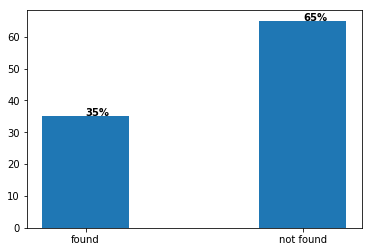

In [101]:
plot_bar([count_found, count_not_found])

In [72]:
df_temp = pd.merge(df_answers[['answers_author_id', 'answers_date_added', 'answers_question_id']], df_questions[['questions_id', 'questions_date_added']], left_on='answers_question_id', right_on='questions_id', how='left')
# df_temp.dropna(inplace=True)
df_temp['answers_date_added'] = pd.to_datetime(df_temp['answers_date_added'])
df_temp['questions_date_added'] = pd.to_datetime(df_temp['questions_date_added'])
df_groups = df_temp.groupby('answers_author_id')

In [73]:
timefreq = list()

def get_timefreq(prof_id): 
#     print(frequency)
    df_data = df_groups.get_group(prof_id)
    time_avg = sum((df_data['answers_date_added'] - df_data['questions_date_added']) // np.timedelta64(1, 'h')) / len(df_data)
    timefreq.append(time_avg)

In [74]:
frequencies.apply(lambda x: get_timefreq(x.prof_ids), axis=1)
# get_timefreq('00009a0f9bda43eba47104e9ac62aff5')

0        None
1        None
2        None
3        None
4        None
5        None
6        None
7        None
8        None
9        None
10       None
11       None
12       None
13       None
14       None
15       None
16       None
17       None
18       None
19       None
20       None
21       None
22       None
23       None
24       None
25       None
26       None
27       None
28       None
29       None
         ... 
10121    None
10122    None
10123    None
10124    None
10125    None
10126    None
10127    None
10128    None
10129    None
10130    None
10131    None
10132    None
10133    None
10134    None
10135    None
10136    None
10137    None
10138    None
10139    None
10140    None
10141    None
10142    None
10143    None
10144    None
10145    None
10146    None
10147    None
10148    None
10149    None
10150    None
Length: 10151, dtype: object

In [75]:
frequencies['time_freq'] = pd.Series(timefreq)
frequencies.tail()

,prof_ids,counts,ans_freq,time_freq
10146,ffdeaf7003a14c80aa237b35f6f636dc,1,0.001689,295.0
10147,ffe2f26d5c174e13b565d026e1d8c503,6,0.250000,735.5
10148,ffeaf7114b59443581b8acb5a9bfb38a,1,0.001689,4466.0
10149,fffa0ff907ff4a9a84cb1b142911eee1,1,0.001689,3646.0
10150,ffffbe8d854a4a5a8ab1a381224f5b80,2,0.003378,1455.5


In [109]:
count_found = 0
count_not_found = 0
likely_profs = []
# testing the method on 100 new questions 
for i in range(0, 100):
    print("Question {}".format(i))
    question = df_questions_test.iloc[i]
    question_id = df_questions_test.iloc[i]['questions_id']

    keywords = extract_keywords(question, 'title')
    likely_professionals = predict_professionals(keywords, 'keywords')
    likely_profs = rank_professionals(likely_professionals, 'time_freq')

    # actual output
    profs = df_answers_test[df_answers_test['answers_question_id']==question_id]
    profs_list = profs['answers_author_id']
    # checking the predicted list contains the professionals who did answer the question
    print(likely_profs[likely_profs['prof_ids'].isin(profs_list)])
    if len(likely_profs[likely_profs['prof_ids'].isin(profs_list)]) == 0:
        count_not_found += 1
    else:
        count_found += 1
    print()
    print()

Question 0
Number of industries matched: 34
Number of professionals matched: 10699
                              prof_ids  counts  ans_freq  time_freq
3644  ef3371ee80904230a7111c6200ef6b46       4  0.153846     520.75


Question 1
Number of industries matched: 1
Number of professionals matched: 420
Empty DataFrame
Columns: [prof_ids, counts, ans_freq, time_freq]
Index: []


Question 2
Number of industries matched: 11
Number of professionals matched: 7390
                              prof_ids  counts  ans_freq   time_freq
1752  a1006e6a58a0447592e2435caa230f78     908  1.533784  1195.01652


Question 3
Number of industries matched: 11
Number of professionals matched: 8049
Empty DataFrame
Columns: [prof_ids, counts, ans_freq, time_freq]
Index: []


Question 4
Number of industries matched: 57
Number of professionals matched: 11474
Empty DataFrame
Columns: [prof_ids, counts, ans_freq, time_freq]
Index: []


Question 5
Number of industries matched: 34
Number of professionals matched: 9898

Number of industries matched: 32
Number of professionals matched: 10134
Empty DataFrame
Columns: [prof_ids, counts, ans_freq, time_freq]
Index: []


Question 49
Number of industries matched: 43
Number of professionals matched: 10945
Empty DataFrame
Columns: [prof_ids, counts, ans_freq, time_freq]
Index: []


Question 50
Number of industries matched: 1
Number of professionals matched: 2576
Empty DataFrame
Columns: [prof_ids, counts, ans_freq, time_freq]
Index: []


Question 51
Number of industries matched: 4
Number of professionals matched: 4785
Empty DataFrame
Columns: [prof_ids, counts, ans_freq, time_freq]
Index: []


Question 52
Number of industries matched: 26
Number of professionals matched: 9486
Empty DataFrame
Columns: [prof_ids, counts, ans_freq, time_freq]
Index: []


Question 53
Number of industries matched: 18
Number of professionals matched: 9003
Empty DataFrame
Columns: [prof_ids, counts, ans_freq, time_freq]
Index: []


Question 54
Number of industries matched: 2
Number o

Number of industries matched: 17
Number of professionals matched: 8783
Empty DataFrame
Columns: [prof_ids, counts, ans_freq, time_freq]
Index: []


Question 95
Number of industries matched: 20
Number of professionals matched: 8154
                              prof_ids  counts  ans_freq  time_freq
2812  f1ca9370286248aba5aae737f92a07dd       4  0.153846      897.5
2329  c9bce562575a4eb3a866452a7334d925       2  0.003378     1168.5


Question 96
Number of industries matched: 30
Number of professionals matched: 10102
                              prof_ids  counts  ans_freq  time_freq
3654  fd1243911adb4061a2dc5235b0711490       3  0.005068      596.0


Question 97
Number of industries matched: 38
Number of professionals matched: 10576
                              prof_ids  counts  ans_freq   time_freq
2502  a71fdedfdb8a478cb19f6fdb761da215      13  0.371429  114.307692


Question 98
Number of industries matched: 16
Number of professionals matched: 7483
Empty DataFrame
Columns: [prof_ids

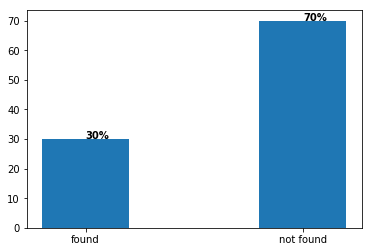

In [110]:
plot_bar([count_found, count_not_found])